# Lead-Scoring-Case-Study


# Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals and Objectives
There are quite a few goals for this case study.

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Steps Followed
* Reading Data
* Cleaning Data
* EDA
* Creating Dummy
* Splitting data into train and test set
* Building Model
* Making Predictions
* Model Evaluation
* ROC Curve
* Precision- Recall
* Prediction on test set

# importing necessary libraries

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, precision_recall_curve
pd.options.display.max_columns = None


# 1. Reading  and Understanding the Data

In [2]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head(50)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
lead_df.shape

(9240, 37)

In [4]:
lead_df.describe().head(20)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Observation: With info we can see some missing values

In [6]:
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Checking the missing values in percentage
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## Observation: as we see here, there are many columns which are having missing value more than 40%, so we can drop such values.

# 2. Cleaning the Data

In [8]:
lead_df = lead_df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index',
                        'Asymmetrique Activity Index','Tags','Lead Profile'], axis=1)
lead_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Low in Relevance,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Might be,No,No,Mumbai,No,Yes,Email Opened


In [9]:
# checking unique values
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Observation: Here we need to drop columns which does not have more unique values/variance since it doesn't help in model building

In [10]:
lead_df = lead_df.drop(['I agree to pay the amount through cheque','Update me on Supply Chain Content',
                         'Get updates on DM Content','Receive More Updates About Our Courses','Magazine','Prospect ID','Lead Number'],axis=1)
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Low in Relevance,Select,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,NaN,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Might be,Mumbai,No,Modified


In [11]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [12]:
# Replacing Select values with nan (there will be no option selected)
lead_df = lead_df.replace('Select', np.nan)

In [13]:
lead_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [14]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

</b> There many columns have missing values, but we cannot just drop them this will cost us loosing a lot of data. Or we can create here 'other' column to keep the data

In [15]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
Belgium                    2
Uganda                     2
Ghana                      2
Asia/Pacific Region        2
Netherlands                2
Bangladesh                 2
Italy                      2
Philippines                2
China                      2
Kenya                      1
Liberia                    1
Vietnam                    1
Indonesia                  1
Malaysia                   1
Switzerland                1
Denmark       

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_df['Country'] = lead_df.apply(lambda x:slots(x['Country']), axis = 1)
lead_df['Country'].value_counts()

outside india    9240
Name: Country, dtype: int64

In [17]:
# As other country's values are not this much so we can keep with in 'India' column
lead_df['Country'] = lead_df["Country"].replace(np.nan, 'India')


In [18]:
# We have changed all the missing values with the nan
lead_df['Specialization'] = lead_df['Specialization'].fillna('not provided')
lead_df['City'] = lead_df['City'].fillna('not provided')
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].fillna('not provided')            
lead_df['What is your current occupation'] =   lead_df['What is your current occupation'].fillna('not provided')               
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('not provided')



In [19]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [20]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [21]:
lead_df.isnull().sum().sort_values(axis=0, ascending=False)

Lead Quality                                     4767
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Search                                              0
A free copy of Mastering The Interview              0
City                                                0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
What is your current occupation                     0
What matters most to you in choosing a course       0
How did you hear about X Education                  0
Specialization                                      0
Country                     

In [22]:
# Replace NaN values in Lead Quality with Not Sure
lead_df['Lead Quality'] = lead_df['Lead Quality'].fillna('Not Sure')

In [23]:
#Dropping the NA values on 3 columns which are very few
lead_df.dropna(inplace=True)

In [24]:
#checking percentage of null values on all columns
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## observation: now we can proceed with data.


# 3. EDA

In [25]:
# now lets check the analysis of the variables

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

* ## Univariate Analysis

* now we will plot some bar plots to see compare


Text(0.5, 1.0, 'Lead Origin')

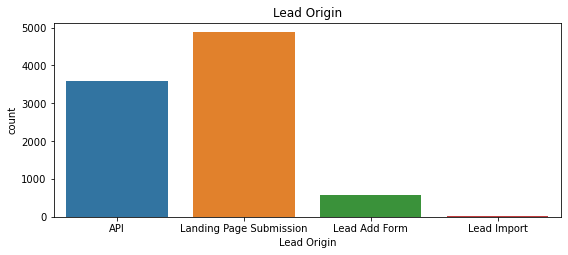

In [26]:
plt.figure(figsize=(20,25))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

* Here we see many number of the people fall under Api and Landing Page Submission

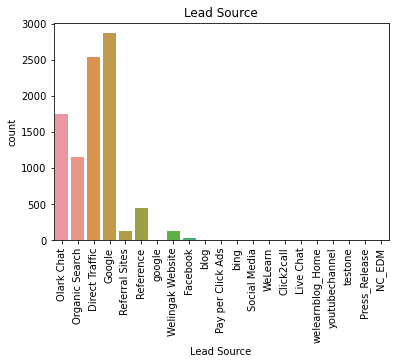

In [27]:
sns.countplot(lead_df['Lead Source']).tick_params(axis='x', rotation=90)
plt.title('Lead Source')
plt.show()

* Many people got to know from Olack chat, Organic Search, Direct Traffic, Google more than other sources.

In [28]:
varlist = ['Do Not Email','Do Not Call']

def map_yesno(x):
    return x.map({'Yes':1,'No':0})
        
lead_df[varlist] = lead_df[varlist].apply(map_yesno)

In [29]:
lead_df['Do Not Email'].value_counts()

0    8358
1     716
Name: Do Not Email, dtype: int64

In [30]:
lead_df['Do Not Call'].value_counts()

0    9072
1       2
Name: Do Not Call, dtype: int64

Text(0.5, 1.0, 'Do Not Call')

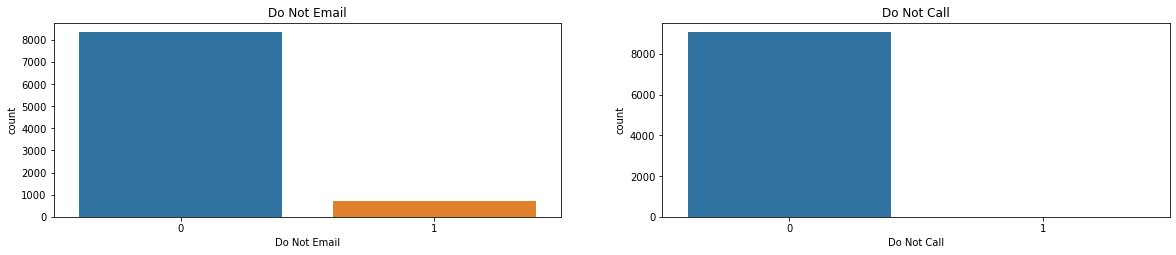

In [31]:
plt.figure(figsize=(20,25))

plt.subplot(6,2,1)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email')



plt.subplot(6,2,2)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call')

* There are very less no of people who actually take up any course

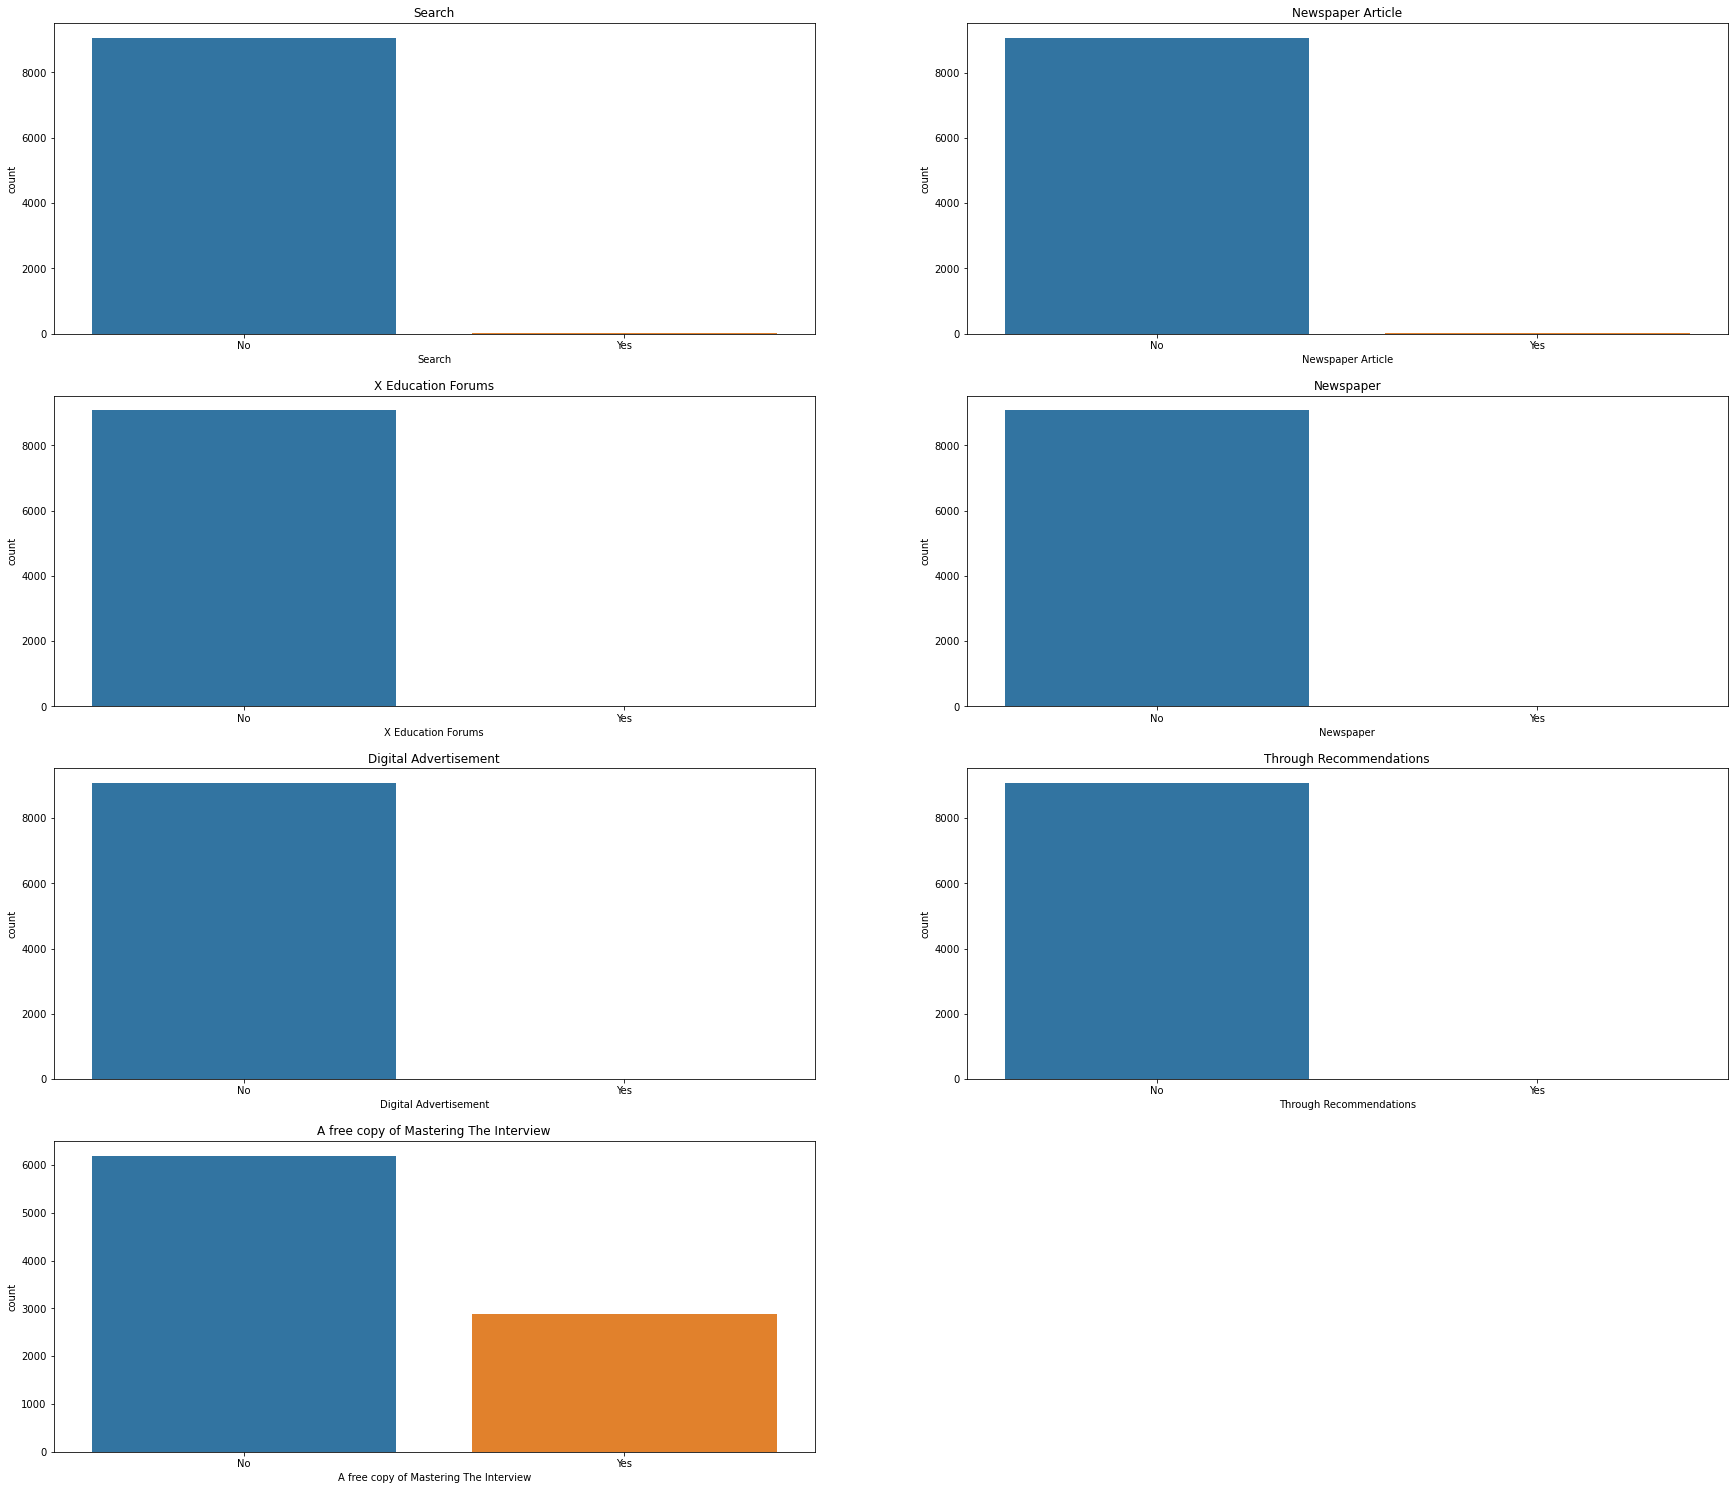

In [32]:

plt.figure(figsize=(30,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Search'])
plt.title('Search')

plt.subplot(6,2,2)
sns.countplot(lead_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,3)
sns.countplot(lead_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,4)
sns.countplot(lead_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,5)
sns.countplot(lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,6)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,7)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')


plt.show()


* As we see a few number of people is in 'A free copy of Mastering the interview'

<function matplotlib.pyplot.show(close=None, block=None)>

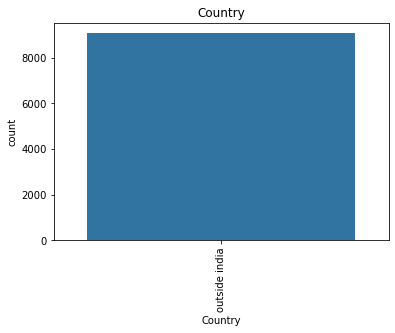

In [33]:
sns.countplot(lead_df['Country']).tick_params(axis='x', rotation=90)
plt.title('Country')
plt.show

* Most of the people are from India.

<function matplotlib.pyplot.show(close=None, block=None)>

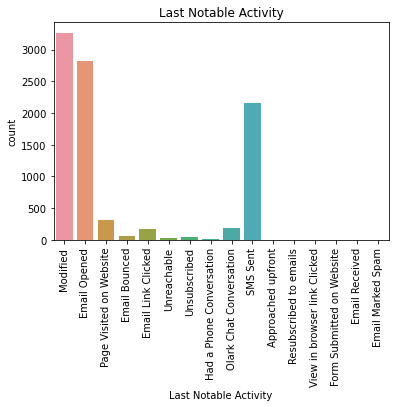

In [34]:
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation=90)
plt.title('Last Notable Activity')
plt.show

* We can see here people's potential and track their activity.

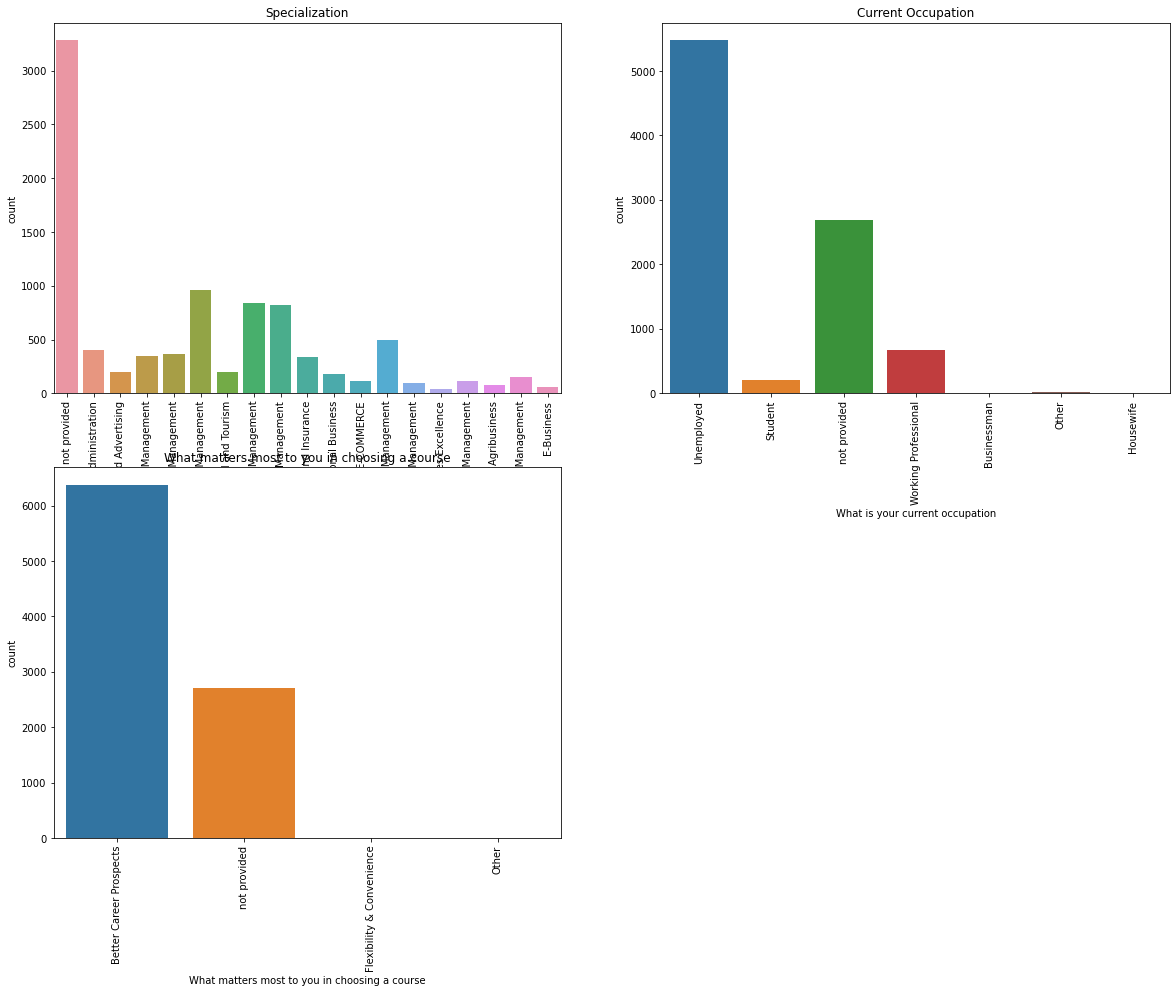

In [35]:
plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
sns.countplot(lead_df['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead_df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(lead_df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.show()

* As we see here a good percentage of the course taking people are unemployed or working.

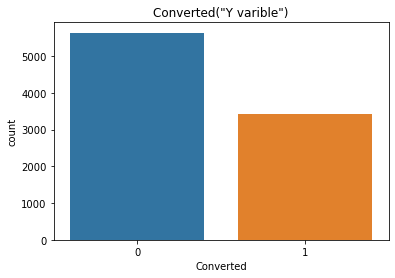

In [36]:
sns.countplot(lead_df['Converted'])
plt.title('Converted("Y varible")')
plt.show()

* All most half of the not converted people are possibly converted 

#  Numeric Variable Analysis

In [37]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

Text(0.5, 1.0, 'TotalVisits')

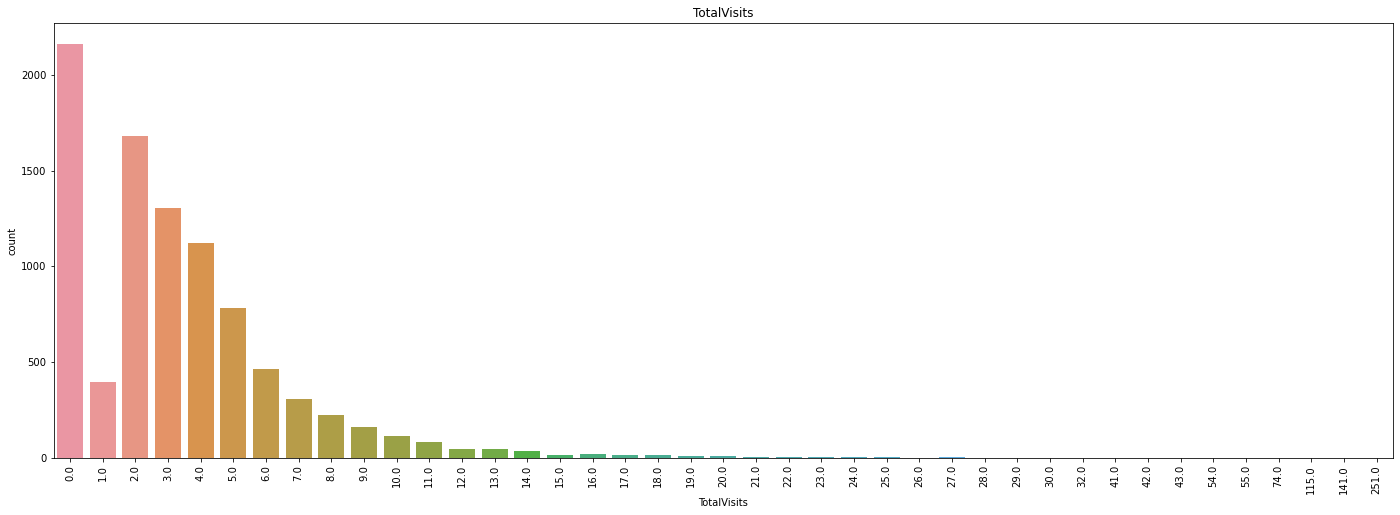

In [38]:
plt.figure(figsize=(24, 8))

sns.countplot(lead_df['TotalVisits']).tick_params(axis='x', rotation = 90)
plt.title('TotalVisits')



<function matplotlib.pyplot.show(close=None, block=None)>

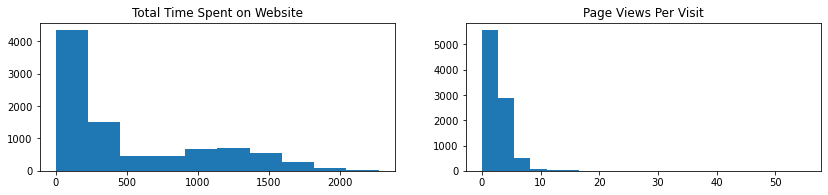

In [39]:
# Plotting Total Time Spent on Website & Page Views Per Visit values to check distribution
plt.figure(figsize = (14,6))
plt.subplot(221)
plt.hist(lead_df['Total Time Spent on Website'], bins =10)
plt.title('Total Time Spent on Website')

plt.subplot(222)
plt.hist(lead_df['Page Views Per Visit'], bins =20)
plt.title('Page Views Per Visit')
plt.show

# Comaring the target variable with related variables means:('Converted' with rest of the variables)

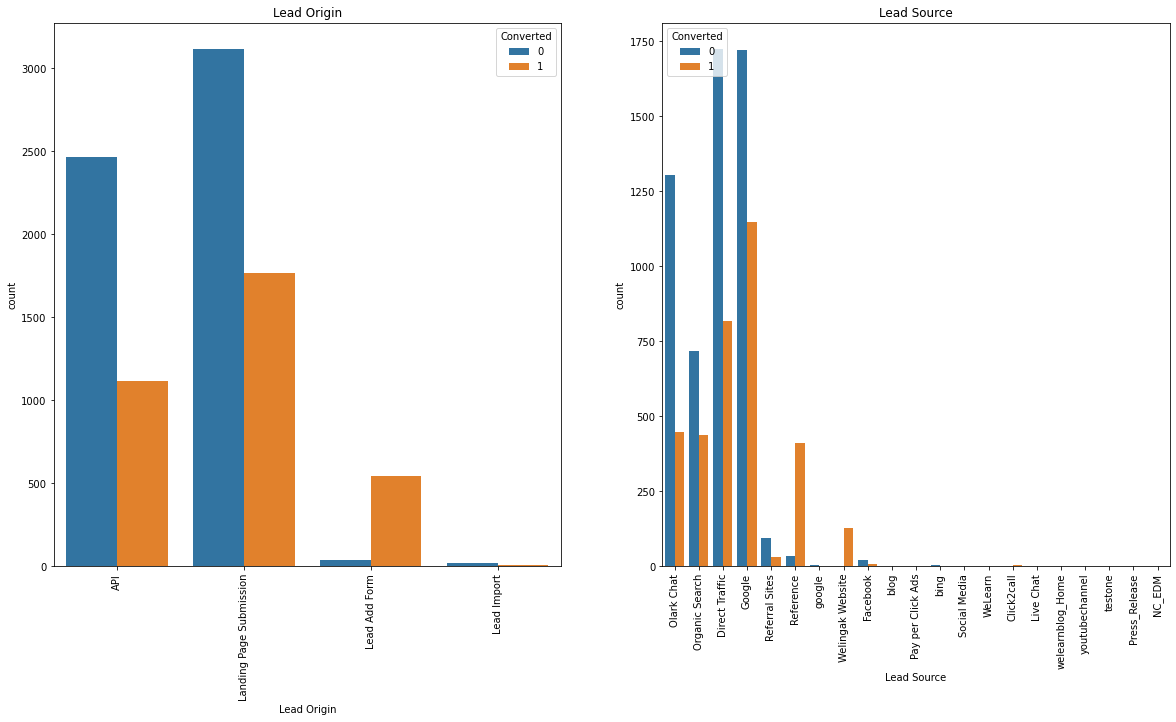

In [40]:
## Plotting Lead Origin & Lead Source
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()


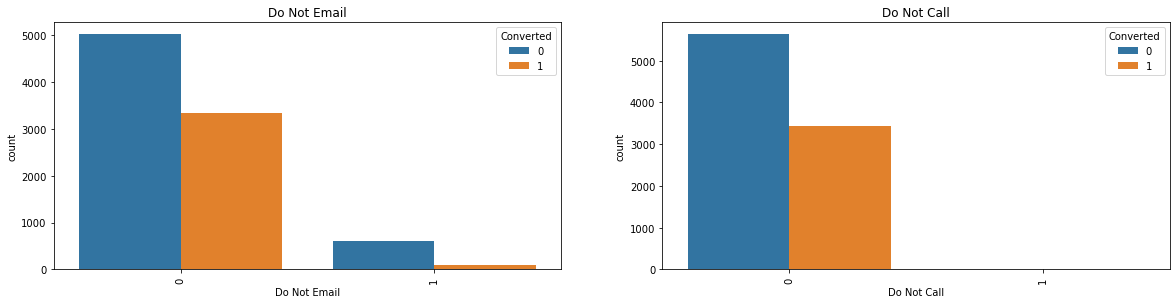

In [41]:
## Plotting Do Not Email & Do Not Call fields
plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')


plt.subplot(2,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

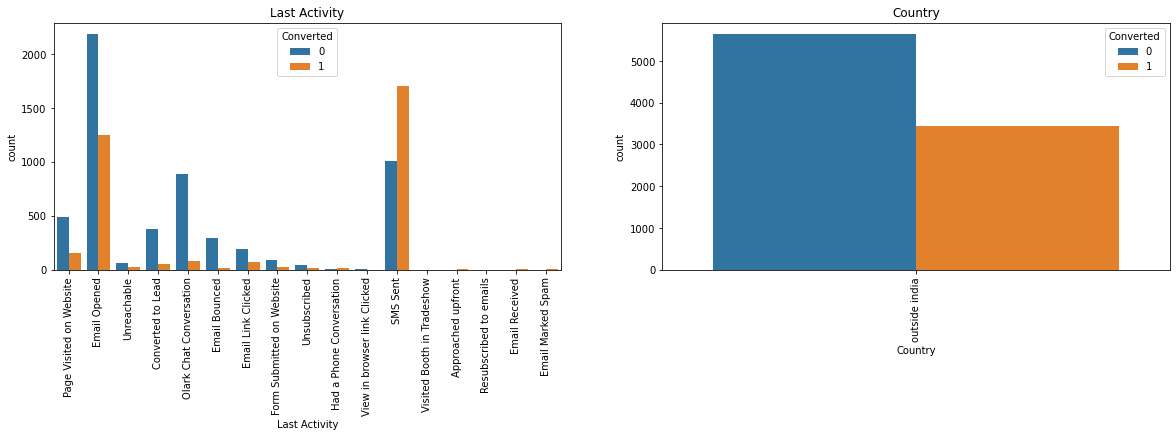

In [42]:
#Plotting Last Activity & Country fields

plt.figure(figsize = (20,10))

plt.subplot(2,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(2,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


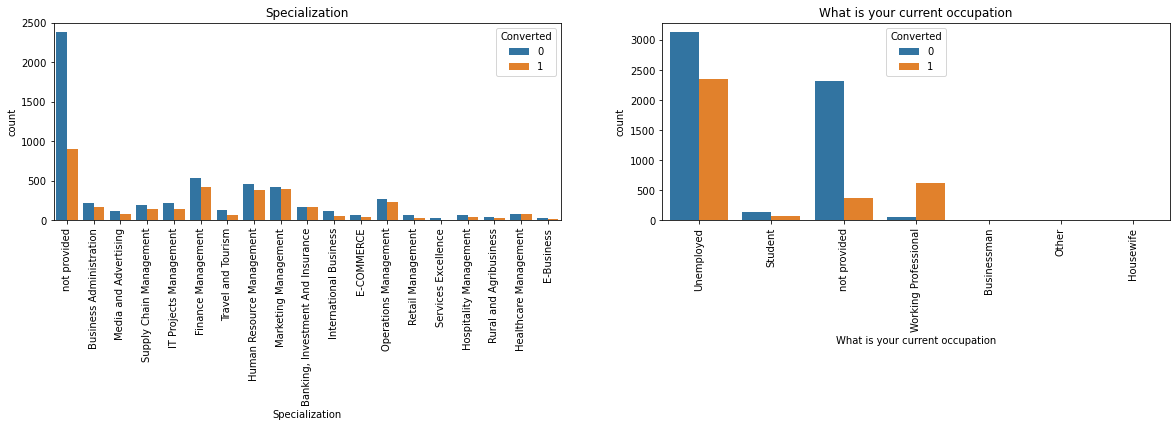

In [43]:
## Plotting Specialization & Current Occupation values

plt.figure(figsize = (20,8))

plt.subplot(2,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

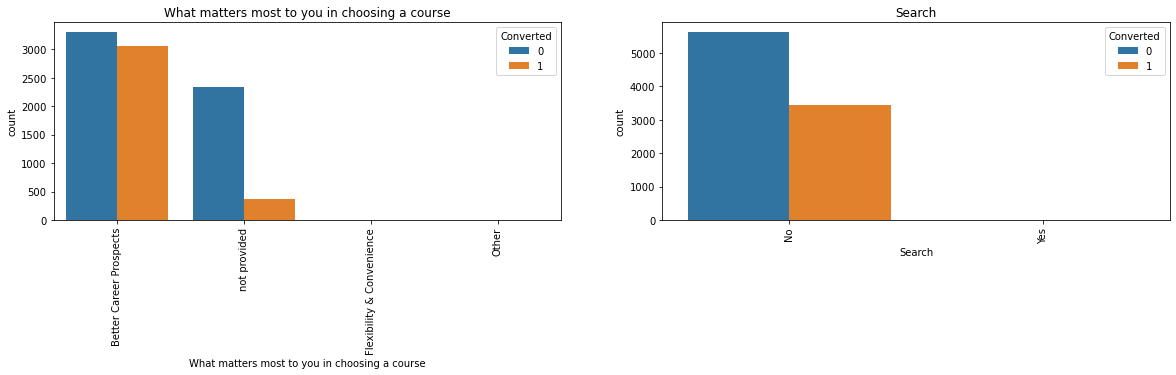

In [44]:
## Plotting Question fields & Search 
plt.figure(figsize = (20,8))

plt.subplot(2,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

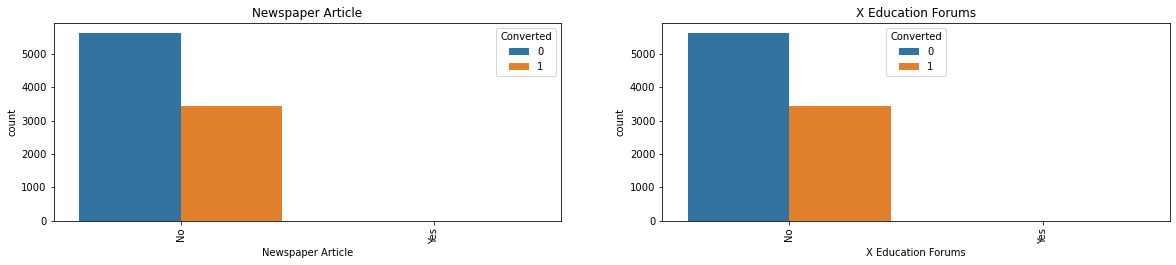

In [45]:
## Plotting NewsPapre Article & XEducation Forums field value

plt.figure(figsize = (20,8))

plt.subplot(2,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(2,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()


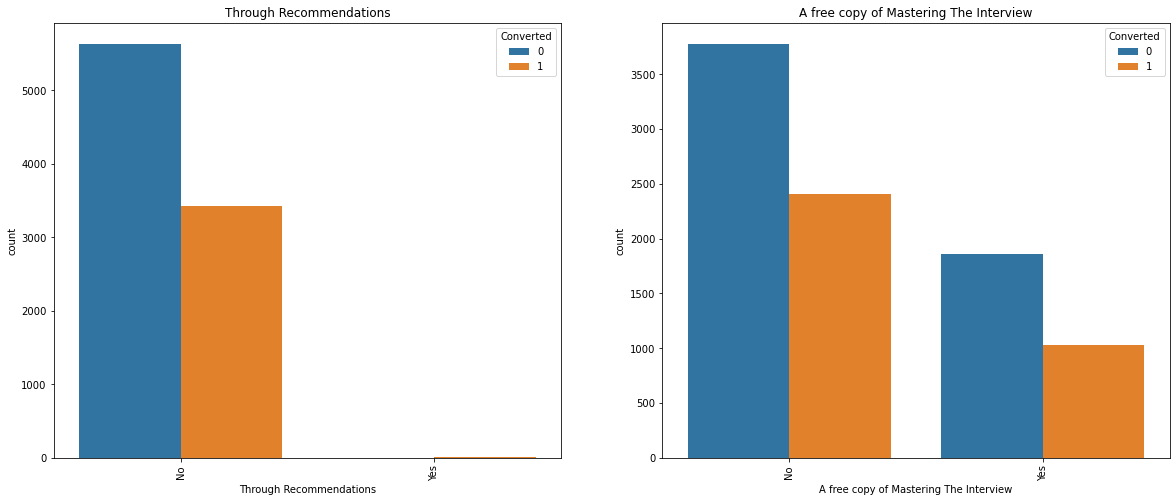

In [46]:
## Plotting Recommendations, Customer responses fields
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()


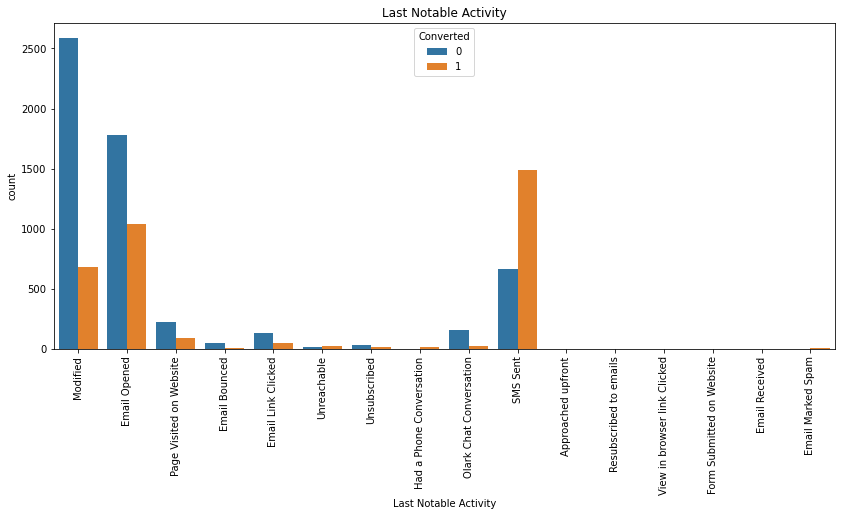

In [47]:
## Plotting Last Notable Activity 
plt.figure(figsize = (14,6))
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

## Observation:
* Most of the leads opted for "Do Not Email" & "Do Not Call"
* Majority of the leads are from India
* Almost huge proportion of leads did not go through Search Items
* Most popular "Last Activity" includes Email opened, Email link clicked, Olark Chat conversation & SMS Sent
* still can be said that people who converted are from 'Landing Page Submission', 'Lead Add Form', 'Google', 'Reference'
* People who are Opening the mail, chacking their SMS box, should be targeted more.
* People who are unemployed and working can be coverted the most.
* The fields like Through Recommendations, X Education Forums, Newspaper Article are all have skewed to No. So not of any use for analysis
* Since most of the leads comes under "UnEmployed" category, they have chosen "Better Career Prospects" and most of them opted for "A free copy of Mastering The Interview"

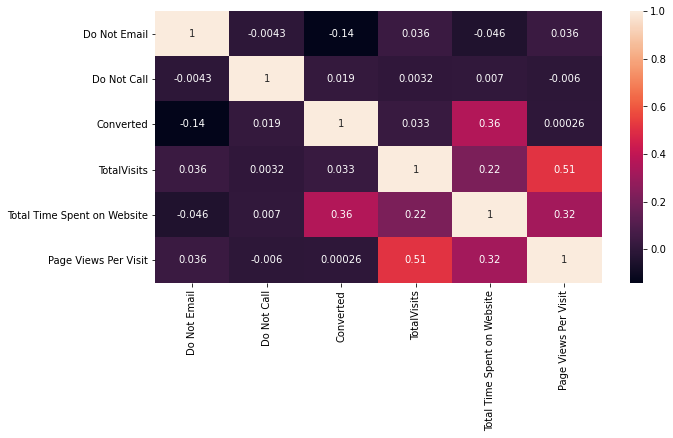

In [48]:
# lets check correlation as well

plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

* can't be said anything now

In [49]:
numeric = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


* We do have outliers in Total Visits and Pages Views Per Visit. We will keep the data since we will loose certain important insights if we remove outlier data to ensure accurate metrics covering all data

# 4. Creating Dummy

In [50]:
leads_final = lead_df.drop(['Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','How did you hear about X Education', 'Lead Quality'], axis=1)
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [51]:
dummy = pd.get_dummies(leads_final[['Lead Origin','Lead Source','Last Activity','Last Notable Activity',
                                    'Specialization','City','What is your current occupation']],drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
leads_final = pd.concat([leads_final,dummy],axis=1)

In [53]:
leads_final.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,outside india,not provided,Unemployed,Better Career Prospects,not provided,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,outside india,not provided,Unemployed,Better Career Prospects,not provided,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,outside india,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submis

In [54]:
leads_final = leads_final.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity',
                                    'Specialization','City','What is your current occupation','Country',
                                'A free copy of Mastering The Interview','What matters most to you in choosing a course'],axis=1)

In [55]:
list(leads_final.columns)

['Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Received',
 'Last Activity_Form Submitted 

In [56]:
# Taking the "Target" variable from the main data
X = leads_final.drop(['Converted'],axis=1)


In [57]:
X.head(3)

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [58]:
y=leads_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# 5. Splitting data into train and test set

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Scaling

In [60]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not provided,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_not provided,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
3009,0,0,-0.284595,-0.160255,-0.179666,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1012,1,0,-0.284595,-0.540048,-0.179666,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
4750,0,0,-0.284595,1.643304,-0.179666,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
7987,0,0,0.295588,2.017593,0.058552,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [61]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

We have approximately 38% conversion rate

# 6. Building Model

In [62]:
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 90 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Do Not Call                                           9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 8   Lead Origin_Lead Import                               9074

##  Feature Selection Using RFE

In [63]:
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 19),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 12),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 9),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 11),
 ('Lead Source_Press_Release', False, 39),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 37),
 ('Lead Source_blog', False, 22),
 ('Lead Source_google', False, 7),
 ('Lead Source_testone', False, 10),
 ('Lea

In [67]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

____All the variables selected by RFE, next statistics part (p-values and the VIFs).___

In [68]:
X_train = X_train[col]

## Model 1: 

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2471.8
Date:                Wed, 12 Jan 2022   Deviance:                       4943.6
Time:                        13:25:23   Pearson chi2:                 6.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0386      0.771      2.645      0.008       0.528       3.549
Do Not Email                                            -1.6110      0.225     -7.172      0.000      -2.051      -1.171
Do Not Call                                             21.4256   3.29e+04      0.001      0.999   -6.44e+04    6.44e+04
Total Time Spent on Website                              1.1164      0.042     26.536      0.000       1.034       1.199
Lead Origin_Landing Page Submission                     -1.0543      0.148     -7.126      0.000      -1.344      -0.764
Lead Origin_Lead Add Form                                1.0345      0.938      1.103      0.270      -0.803       2.872
Lead Source_Direct Traffic                              -0.4944      0.418     -1.181      0.237      -1.315       0.326
Lead Source_Google                                      -0.1782      0.413     -0.432      0.666      -0.987       0.631
Lead Source_NC_EDM                                      23.4660   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                                   0.9515      0.416      2.290      0.022       0.137       1.766
Lead Source_Organic Search                              -0.4031      0.421     -0.958      0.338      -1.228       0.422
Lead Source_Reference                                    1.7700      0.912      1.942      0.052      -0.017       3.557
Lead Source_Referral Sites                              -0.4859      0.541     -0.898      0.369      -1.547       0.575
Lead Source_Social Media                                 1.4082      1.551      0.908      0.364      -1.631       4.448
Lead Source_Welingak Website                             4.2389      1.146      3.699      0.000       1.993       6.485
Last Activity_Converted to Lead                         -1.0028      0.252     -3.983      0.000      -1.496      -0.509
Last Activity_Email Bounced                             -0.8160      0.459     -1.779      0.075      -1.715       0.083
Last Activity_Email Link Clicked                        -0.3553      0.395     -0.900      0.368      -1.129       0.418
Last Activity_Email Marked Spam                         21.7000   3.38e+04      0.001      0.999   -6.62e+04    6.63e+04
Last Activity_Form Submitted on Website                 -0.6370      0.367     -1.737      0.082      -1.356       0.082
Last Activity_Had a Phone Conversation                   1.7156      1.117      1.535      0.125      -0.475       3.906
Last Activity_Olark Chat Conversation                   -1.2518      0.223     -5.620      0.000      -1.688      -0.815
Last Activity_Page Visited on Website                   -0

___The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_Housewife	'___

In [70]:
# dropping a variable from X_train

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)


## Model 2: 

In [71]:
# Fitting the model again with new set of  features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.8
Date:                Wed, 12 Jan 2022   Deviance:                       4947.5
Time:                        13:25:23   Pearson chi2:                 6.15e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5053      0.732      3.422      0.001       1.071       3.940
Do Not Email                                            -1.6156      0.225     -7.187      0.000      -2.056      -1.175
Do Not Call                                             20.4270   1.99e+04      0.001      0.999   -3.91e+04    3.91e+04
Total Time Spent on Website                              1.1152      0.042     26.526      0.000       1.033       1.198
Lead Origin_Landing Page Submission                     -1.0486      0.148     -7.092      0.000      -1.338      -0.759
Lead Origin_Lead Add Form                                1.0392      0.937      1.109      0.268      -0.798       2.877
Lead Source_Direct Traffic                              -0.4948      0.418     -1.182      0.237      -1.315       0.325
Lead Source_Google                                      -0.1768      0.413     -0.428      0.668      -0.986       0.632
Lead Source_NC_EDM                                      22.4637   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.9543      0.416      2.297      0.022       0.140       1.769
Lead Source_Organic Search                              -0.3981      0.421     -0.946      0.344      -1.223       0.427
Lead Source_Reference                                    1.7730      0.911      1.946      0.052      -0.013       3.559
Lead Source_Referral Sites                              -0.4816      0.541     -0.890      0.374      -1.542       0.579
Lead Source_Social Media                                 1.4209      1.551      0.916      0.359      -1.618       4.460
Lead Source_Welingak Website                             4.2378      1.146      3.699      0.000       1.992       6.483
Last Activity_Converted to Lead                         -1.0018      0.252     -3.980      0.000      -1.495      -0.508
Last Activity_Email Bounced                             -0.8111      0.459     -1.768      0.077      -1.710       0.088
Last Activity_Email Link Clicked                        -0.3548      0.395     -0.899      0.369      -1.128       0.419
Last Activity_Email Marked Spam                         20.7073   2.05e+04      0.001      0.999   -4.02e+04    4.02e+04
Last Activity_Form Submitted on Website                 -0.6461      0.366     -1.764      0.078      -1.364       0.072
Last Activity_Had a Phone Conversation                   1.7165      1.117      1.536      0.124      -0.474       3.907
Last Activity_Olark Chat Conversation                   -1.2533      0.223     -5.622      0.000      -1.690      -0.816
Last Activity_Page Visited on Website                   -0

___VIF values are fine but P value are not so again need to drop variable 'Last Activity_Had a Phone Conversation'___

In [72]:
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [73]:
cols = X_train.columns
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable

## Model 3:

In [74]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2475.0
Date:                Wed, 12 Jan 2022   Deviance:                       4950.0
Time:                        13:25:24   Pearson chi2:                 6.15e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5195      0.732      3.443      0.001       1.085       3.954
Do Not Email                                            -1.6101      0.225     -7.156      0.000      -2.051      -1.169
Do Not Call                                             20.4282   1.99e+04      0.001      0.999    -3.9e+04    3.91e+04
Total Time Spent on Website                              1.1158      0.042     26.549      0.000       1.033       1.198
Lead Origin_Landing Page Submission                     -1.0447      0.148     -7.072      0.000      -1.334      -0.755
Lead Origin_Lead Add Form                                1.0331      0.937      1.103      0.270      -0.803       2.870
Lead Source_Direct Traffic                              -0.4981      0.418     -1.191      0.234      -1.318       0.322
Lead Source_Google                                      -0.1810      0.413     -0.439      0.661      -0.989       0.627
Lead Source_NC_EDM                                      22.4639   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.9480      0.415      2.282      0.022       0.134       1.762
Lead Source_Organic Search                              -0.3923      0.421     -0.933      0.351      -1.217       0.432
Lead Source_Reference                                    1.7725      0.911      1.946      0.052      -0.013       3.558
Lead Source_Referral Sites                              -0.4587      0.538     -0.853      0.394      -1.513       0.595
Lead Source_Social Media                                 1.4148      1.552      0.912      0.362      -1.626       4.456
Lead Source_Welingak Website                             4.2352      1.145      3.698      0.000       1.990       6.480
Last Activity_Converted to Lead                         -1.0250      0.251     -4.082      0.000      -1.517      -0.533
Last Activity_Email Bounced                             -0.8382      0.458     -1.829      0.067      -1.737       0.060
Last Activity_Email Link Clicked                        -0.3771      0.394     -0.957      0.339      -1.150       0.395
Last Activity_Email Marked Spam                         20.6785   2.05e+04      0.001      0.999   -4.02e+04    4.02e+04
Last Activity_Form Submitted on Website                 -0.6647      0.366     -1.816      0.069      -1.382       0.053
Last Activity_Olark Chat Conversation                   -1.2760      0.222     -5.741      0.000      -1.712      -0.840
Last Activity_Page Visited on Website                   -0.4206      0.243     -1.731      0.083      -0.897       0.056
Last Activity_Resubscribed to emails                    11

In [75]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,Last Activity_Resubscribed to emails,inf
31,Last Notable Activity_Resubscribed to emails,inf
39,What is your current occupation_Unemployed,71.43
4,Lead Origin_Lead Add Form,66.28
10,Lead Source_Reference,48.58
6,Lead Source_Google,36.69
41,What is your current occupation_not provided,36.08
5,Lead Source_Direct Traffic,32.87
8,Lead Source_Olark Chat,21.82
13,Lead Source_Welingak Website,15.67


# 7. Making Prediction

In [76]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.076624
1012    0.176600
9226    0.372741
4750    0.712268
7987    0.790395
1281    0.825514
2880    0.048496
4971    0.975879
7536    0.868619
1248    0.759365
dtype: float64

In [77]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07662425, 0.17660008, 0.37274128, 0.71226831, 0.79039494,
       0.8255143 , 0.04849646, 0.97587852, 0.86861894, 0.75936506])

In [78]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.076624
1,0,0.176600
2,0,0.372741
3,1,0.712268
4,1,0.790395


In [79]:
# Substituting 0 or 1 with the cut off as 0.4
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.076624,0
1,0,0.176600,0
2,0,0.372741,0
3,1,0.712268,1
4,1,0.790395,1


# 8. Model Evaluation

In [80]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3276,  629],
       [ 527, 1919]], dtype=int64)

In [81]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)


0.8179814202487797

* That's around 81% accuracy which is a very good value

In [82]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [83]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7845461978740801

In [84]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.8389244558258643

In [85]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.16107554417413572


In [86]:
# positive predictive value 
print (TP / float(TP+FP))

0.7531397174254317


In [87]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8614251906389693


# 9. ROC courve

In [88]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


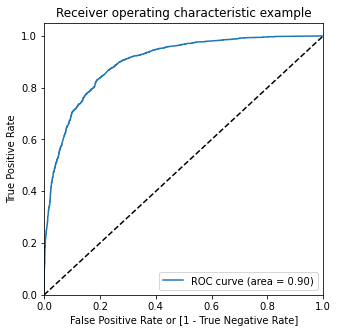

In [90]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

* good curve

## Finding Optimal Cutoff Point

In [91]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.076624,0,1,0,0,0,0,0,0,0,0,0
1,0,0.176600,0,1,1,0,0,0,0,0,0,0,0
2,0,0.372741,0,1,1,1,1,0,0,0,0,0,0
3,1,0.712268,1,1,1,1,1,1,1,1,1,0,0
4,1,0.790395,1,1,1,1,1,1,1,1,1,0,0


In [92]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df


,prob,accuracy,sensi,speci
0.0,0.0,0.385136,1.000000,0.000000
0.1,0.1,0.655960,0.975470,0.455826
0.2,0.2,0.773422,0.921504,0.680666
0.3,0.3,0.805228,0.873262,0.762612
0.4,0.4,0.817981,0.784546,0.838924
0.5,0.5,0.823020,0.716680,0.889629
0.6,0.6,0.814360,0.646770,0.919334
0.7,0.7,0.792159,0.544563,0.947247
0.8,0.8,0.770587,0.451349,0.970551
0.9,0.9,0.724453,0.306623,0.986172


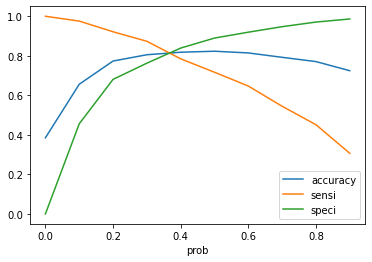

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.076624,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.176600,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.372741,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.712268,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.790395,1,1,1,1,1,1,1,1,1,0,0,1


## Lead Score Assignment

In [95]:
y_train_pred_final['Lead_Score'] = round(y_train_pred_final.Conversion_Prob * 100)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.076624,0,1,0,0,0,0,0,0,0,0,0,0,8.0
1,0,0.176600,0,1,1,0,0,0,0,0,0,0,0,0,18.0
2,0,0.372741,0,1,1,1,1,0,0,0,0,0,0,0,37.0
3,1,0.712268,1,1,1,1,1,1,1,1,1,0,0,1,71.0
4,1,0.790395,1,1,1,1,1,1,1,1,1,0,0,1,79.0


In [96]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8179814202487797

In [97]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3276,  629],
       [ 527, 1919]], dtype=int64)

In [98]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [99]:
# Sensitivity of our logistic regression model
TP / float(TP+FN)

0.7845461978740801

In [100]:
# Specificity of our logistic regression model
TN / float(TN+FP)

0.8389244558258643

In [101]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.16107554417413572


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7531397174254317


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8614251906389693


# 11. Precision- Recall

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3276,  629],
       [ 527, 1919]], dtype=int64)

In [105]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7531397174254317

In [106]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7845461978740801

* With the current cut off as 0.4 we have Precision around 74% and Recall around 77%


## Precision and recall tradeoff

In [107]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

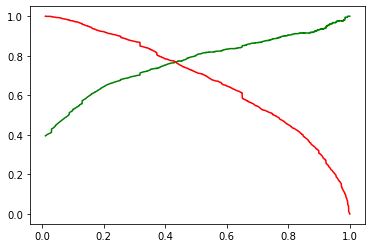

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.076624,0,1,0,0,0,0,0,0,0,0,0,0,8.0
1,0,0.176600,0,1,1,0,0,0,0,0,0,0,0,0,18.0
2,0,0.372741,0,1,1,1,1,0,0,0,0,0,0,0,37.0
3,1,0.712268,1,1,1,1,1,1,1,1,1,0,0,1,71.0
4,1,0.790395,1,1,1,1,1,1,1,1,1,0,0,1,79.0


In [110]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8179814202487797

In [111]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3276,  629],
       [ 527, 1919]], dtype=int64)

In [112]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [113]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7531397174254317

In [114]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7845461978740801

* With the current cut off as 0.4 we have Precision around 74% and Recall around 77%

# 12. Prediction on test set

In [115]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [116]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable,Specialization_Hospitality Management,Specialization_Services Excellence,Specialization_not provided,City_Tier II Cities,City_not provided,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not provided
3271,0,0,-0.600595,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1490,0,0,1.887326,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7936,0,0,-0.752879,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4216,0,0,-0.888650,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [117]:
X_test_sm = sm.add_constant(X_test)

In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

In [119]:
y_test_pred[:10]

3271    0.062125
1490    0.966884
7936    0.052931
4216    0.884453
3830    0.054154
1800    0.679042
6507    0.451110
4821    0.317700
4223    0.922382
4714    0.159523
dtype: float64

In [120]:
# Coverting it to df
y_pred_1 = pd.DataFrame(y_test_pred)

In [121]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [122]:
y_test_df['Prospect ID'] = y_test_df.index

In [123]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [124]:
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_pred_1, y_test_df],axis=1)
y_pred_final.head()

,0,Converted,Prospect ID
0,0.062125,0,3271
1,0.966884,1,1490
2,0.052931,0,7936
3,0.884453,1,4216
4,0.054154,0,3830


In [125]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Conversion_Prob,Converted,Prospect ID
0,0.062125,0,3271
1,0.966884,1,1490
2,0.052931,0,7936
3,0.884453,1,4216
4,0.054154,0,3830


In [126]:
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'],axis=1)

In [127]:
# Mapping Lead Converted or not based on Cut-off chosen
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,3271,0,0.062125,0
1,1490,1,0.966884,1
2,7936,0,0.052931,0
3,4216,1,0.884453,1
4,3830,0,0.054154,0


Checking accuracy on test set

In [128]:
## Calculating Accuracy Score on test set
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8160117517443995

In [129]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1455,  279],
       [ 222,  767]], dtype=int64)

In [130]:
# Taking False Positive, True Negative values from Confusion Matrix
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
# Sensitivity of our logistic regression model on test set
TP / float(TP+FN)

0.775530839231547

In [132]:
# Specificity of our logistic regression model on test set
TN / float(TN+FP)

0.8391003460207612

# Conclusion
## :- It was found that the variables that mattered the most in the potential leads are

* 1. The total time spend on the Website.
* 2.Total number of visits.
* 3.When the lead source was:
_ a. Google
_ b. Direct traffic
 _c. Organic search
 _d. Welingak website
* 4.When the last activity was:
 _a. SMS
 _b. Olark chat conversation
* 5.When the lead origin is Lead add format.
* 6.When their current occupation is as a working professional.
* 7.Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.